# 列表 (list) / 集合(set) / 字典 (dict) 检索时间对比

列表（list）、元组（tuple）、字典（dict）和集合（set）

集合(set) > 字典 (dict) > 列表 (list)

查找速度快,无论 dict 有 10 个元素还是 10 万个元素，查找速度都一样。而 list 的查找速度随着元素增加而逐渐下降。

不过 dict 的查找速度快不是没有代价的，dict 的缺点是占用内存大，还会浪费很多内容，list 正好相反，占用内存小，但是查找速度慢。

Reference :

https://blog.csdn.net/chl183/article/details/107744230

https://blog.csdn.net/qq_38048756/article/details/119756413


In [1]:
# 列表/集合/字典检索时间对比
import numpy
import time

l = []
sl = set()
dl = dict()
r = numpy.random.randint(0, 1000000,10000)

for i in range(0, 10000):
    l.append(r[i])
    sl.add(r[i])
    dl.setdefault(r[i],1)

# 計算通過 set 來查找的效率
# start = time.clock()
start = time.process_time()
for i in range(10000):
    t = i in sl
end = time.process_time()
# end = time.clock()
print("Process Time: time of set is %.5f" % float(end-start))

start = time.perf_counter()
for i in range(10000):
    t = i in sl
end = time.perf_counter()
print("Perf Counter: time of set is %.5f" % float(end-start))

# O(1) ~ O(n)
# 計算通過 dict 的效率
start = time.process_time()
for i in range(10000):
    t = i in dl
end = time.process_time()
print("Process Time: time of dict is %.5f" % float(end-start))

start = time.perf_counter()
for i in range(10000):
    t = i in dl
end = time.perf_counter()
print("Perf Counter: time of dict is %.5f" % float(end-start))


# 計算通過 list 的效率
start = time.process_time()
for i in range (10000):
    t = i in l
end = time.process_time()
print("Process Time: time of list is %.5f" % float(end-start))

start = time.perf_counter()
for i in range (10000):
    t = i in l
end = time.perf_counter()
print("Perf Counter: time of list is %.5f" % float(end-start))

Process Time: time of set is 0.00131
Perf Counter: time of set is 0.00109
Process Time: time of dict is 0.00145
Perf Counter: time of dict is 0.00118
Process Time: time of list is 10.91984
Perf Counter: time of list is 10.88804


# time.clock() 問題

From the Python 3.8 doc:

The function time.clock() has been removed, after having been deprecated since Python 3.3: 

use time.perf_counter() or time.process_time() instead, depending on your requirements, to have well-defined behavior. (Contributed by Matthias Bussonnier in bpo-36895.)

time.clock()在 3.8 中被刪除，因為它具有平台相關的行為：

- 在 Unix 上，這將返回當前處理器時間（以秒為單位）

- 在 Windows 上，這將返回掛鐘時間（以秒為單位）

https://docs.python.org/3.7/library/time.html?highlight=time%20clock#time.clock

1. Processor Time: This is how long this specific process spends actively being executed on the CPU. Sleep, waiting for a web request, or time when only other processes are executed will not contribute to this.
處理器時間：這是該特定進程在 CPU 上主動執行所花費的時間。睡眠、等待 Web 請求或僅執行其他進程的時間不會對此產生影響。

- Use time.process_time()
採用 time.process_time()


2. Wall-Clock Time: This refers to how much time has passed "on a clock hanging on the wall", i.e. outside real time.
掛鐘時間：這是指“掛在牆上的時鐘”已經過去了多少時間，即在實時之外。

- Use time.perf_counter()
採用 time.perf_counter()

  - time.time() also measures wall-clock time but can be reset, so you could go back in time
  time.time() 也測量掛鐘時間，但可以重置，所以你可以回到過去

  - time.monotonic() cannot be reset (monotonic = only goes forward) but has lower precision than time.perf_counter()
  time.monotonic() 無法重置（單調 = 僅向前）但精度低於time.perf_counter()



# 内置集合数据类型-测试

- 列表 list

- 元组 tuple

- 集合 set

- 字符串 string

In [2]:
a = [ 5, 3, 9, 4]
print(a.index(3))

a = [ 1, 2, 3, 4]
print(a[2])

a = [ 1, 2, 3, 4]
print(3 in a)

a = [ 1, 2, 3, 4]
a.append(6)
print(a)

a = [ 1, 2, 3, 4]
print(a.pop())
print(a)

a = [ 1, 2, 3, 4]
print(a.pop(0))

a = [ 1, 2, 3, 4]
print(a.insert( 0, 8))
print(a)

a = [ 1, 3, 2, 4]
print(a.sort())
print(a)

b = ( 1, 2, 3, 4)
# 列印異常
# b[2] = 0
try:
    b[2] = 0
    print(b[2])
except Exception as e: 
    print(repr(e))
print(b)

1
3
True
[1, 2, 3, 4, 6]
4
[1, 2, 3]
1
None
[8, 1, 2, 3, 4]
None
[1, 2, 3, 4]
TypeError("'tuple' object does not support item assignment")
(1, 2, 3, 4)


# 列印異常
```
b = ( 1, 2, 3, 4)
# b[2] = 0
try:
    b[2] = 0
    print(b[2])
except Exception as e: 
    print(repr(e))
print(b)
```

# 控制結構

- 迭代
    - while 語句
    - for 語句
- 選擇
    - if, elif, else 語句

# 控制結構 - while 語句

In [3]:
counter = 1
while counter <= 5:
    print("Hello, world")
    counter = counter + 1

Hello, world
Hello, world
Hello, world
Hello, world
Hello, world


# 控制结构 - for 语句

In [4]:
for item in [1,3,6,2,5]:
    print(item)
print("===== 1 =====")
for item in range(5):
    print(item ** 2)
print("===== 2 =====")
wordlist = ['cat', 'dog', 'rabbit']
letterlist = []
for aword in wordlist:
    for aletter in aword:
        letterlist.append(aletter)
print(letterlist)
print("===== 3 =====")

1
3
6
2
5
===== 1 =====
0
1
4
9
16
===== 2 =====
['c', 'a', 't', 'd', 'o', 'g', 'r', 'a', 'b', 'b', 'i', 't']
===== 3 =====


# 控制結構 - break 語句

In [5]:
for letter in 'Python': # 第一個實例
    if letter == 'h':
        break
    print('當前字母 : ', letter)

var = 10 # 第二個實例
while var > 0:
    print ('當前變量值 :', var)
    var = var - 1
    if var == 5:
        break
print("Good bye!")

當前字母 :  P
當前字母 :  y
當前字母 :  t
當前變量值 : 10
當前變量值 : 9
當前變量值 : 8
當前變量值 : 7
當前變量值 : 6
Good bye!


# 控制結構 - continue 語句

In [6]:
for letter in 'Python': # 第一個實例
    if letter == 'h':
        continue
    print('當前字母 : ', letter)

var = 10 # 第二個實例
while var > 0: 
    var = var - 1
    if var == 5:
        continue
    print ('當前變量值 :', var)
print("Good bye!")

當前字母 :  P
當前字母 :  y
當前字母 :  t
當前字母 :  o
當前字母 :  n
當前變量值 : 9
當前變量值 : 8
當前變量值 : 7
當前變量值 : 6
當前變量值 : 4
當前變量值 : 3
當前變量值 : 2
當前變量值 : 1
當前變量值 : 0
Good bye!


# 控制結構 - if, elif, else 語句

In [7]:
score = 88
if score >= 90 :
    print('A')
else :
    if score >= 80 :
        print('B')
    else :
        if score >= 70 :
            print('C')
        else :
            if score >= 60 :
                print('D')
            else :
                print('F')

B


In [8]:
score = 69
if score >= 90 :
    print('A')
elif score >= 80 :
    print('B')
elif score >= 70 :
    print('C')
elif score >= 60 :
    print('D')
else :
    print('F')

D


In [9]:
import math
n = -3
if n < 0:
    n = abs(n)
print(math.sqrt(n))

1.7320508075688772


# 控制結構 - 創建列表

In [10]:
sqlist = []
for x in range(1, 11):
    sqlist.append(x * x)
print("1 :", sqlist)

sqlist = [x * x for x in range(1, 11)]
print("2 :", sqlist)

sqlist = [x * x for x in range(1, 11) if x % 2 != 0]
print("3 :", sqlist)

[ch.upper() for ch in 'comprehension' if ch not in 'aeiou']

1 : [1, 4, 9, 16, 25, 36, 49, 64, 81, 100]
2 : [1, 4, 9, 16, 25, 36, 49, 64, 81, 100]
3 : [1, 9, 25, 49, 81]


['C', 'M', 'P', 'R', 'H', 'N', 'S', 'N']

# 定義函數

```
def square(n):
    return n ** 2
```
square : 函數名
n : 參數
return n ** 2 : 函數體

In [11]:
# 定義函數
def square(n):
    return n ** 2
print(square(3))
print(square(square(3)))

9
81


# 定义函数 - 牛顿法

牛顿法是一种在实数域和复数域上近似求解方程的方法。方法使用函数 $f(x)$ 的泰勒级数的前面几项来寻找方程 $f(x) = 0 $的根。

$$ 0 = (x - x_0).f'(x_0)+f(x_0)$$

推導流程 : $ 0 = (x - x_0).f'(x_0)+f(x_0)$ -> $ x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$ -> `root = (1/2) * (root + (input_num/ root))`

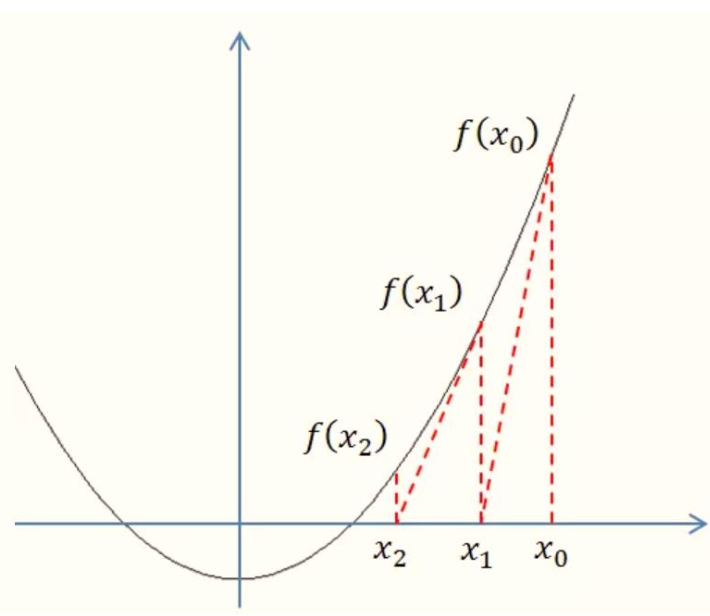


In [12]:
def squareroot(input_num):
    root = input_num/2
    for k in range(20):
        root = (1/2)* (root + (input_num/root))
    return root

print(squareroot(3))

1.7320508075688772


# 面向对象 - 定义类

## 创建类

```
class ClassName:
	'類的幫助訊息' # 類文檔字符串
	class_suite # 類體
```

## 创建实例对象

```
“創建 Employee 類的第一個對像”
emp1 = Employee("Zara", 2000)
“創建 Employee 類的第二個對像”
emp2 = Employee("Manni", 5000)
```

## 访问属性

```
emp1.displayEmployee()
emp2.displayEmployee()
print("Total Employee %d" % Employee.empCount)
```

## 实例

```
class Employee:
    '所有員工的基類'
    empCount = 0
    def __init__(self, name, salary):
        self.name = name
        self.salary = salary 
        Employee.empCount += 1
    def displayCount(self):
        print("Total Employee %d" % Employee.empCount)
    def displayEmployee(self):
        print("Name : ", self.name, ", Salary : ", self.salary)
```

In [13]:
class Employee:
    #'所有員工的基類'
    empCount = 0
    def __init__(self, name, salary):
        self.name = name
        self.salary = salary 
        Employee.empCount += 1
    def displayCount(self):
        print("Total Employee %d" % Employee.empCount)
    def displayEmployee(self):
        print("Name : ", self.name, ", Salary : ", self.salary)

# “創建 Employee 類的第一個對像”
emp1 = Employee("Zara", 2000)
# “創建 Employee 類的第二個對像”
emp2 = Employee("Manni", 5000)

emp1.displayEmployee()
emp2.displayEmployee()
print("Total Employee %d" % Employee.empCount)

Name :  Zara , Salary :  2000
Name :  Manni , Salary :  5000
Total Employee 2


# LeetCode 1. Two Sum 兩數之和

Given an array of integers nums and an integer target, return indices of the two numbers such that they add up to target.

You may assume that each input would have exactly one solution, and you may not use the same element twice.

You can return the answer in any order.

给定一个整数数组 nums 和一个整数目标值 target，请你在该数组中找出 和为目标值 target  的那 两个 整数，并返回它们的数组下标。

你可以假设每种输入只会对应一个答案。但是，数组中同一个元素在答案里不能重复出现。

你可以按任意顺序返回答案。

Example 1:

```
Input: nums = [2,7,11,15], target = 9
Output: [0,1]
Explanation: Because nums[0] + nums[1] == 9, we return [0, 1].
```

Example 2:

```
Input: nums = [3,2,4], target = 6
Output: [1,2]
```

Example 3:

```
Input: nums = [3,3], target = 6
Output: [0,1]
```

In [14]:
class Solution(object):
   def twoSum(self, nums, target):
      """
      :type nums: List[int]
      :type target: int
      :rtype: List[int]
      """
      for i in range(len(nums)):
         tmp = nums[i]
         remain = nums[i+1:]
         if target - tmp in remain:
                return[i, remain.index(target - tmp)+ i + 1]
input_list = [ 2, 7, 11, 15]
target = 9
ob1 = Solution()
print(ob1.twoSum(input_list, target))

[0, 1]


In [15]:
class Solution(object):
    def twoSum(self, nums, target):
        """
        :type nums: List[int]
        :type target: int
        :rtype: List[int]
        """
        dict = {}
        for i in range(len(nums)):
            if target - nums[i] not in dict:
                dict[nums[i]] = i
            else:
                return [dict[target - nums[i]], i]
input_list = [ 2, 7, 11, 15]
target = 9
ob1 = Solution()
print(ob1.twoSum(input_list, target))

[0, 1]


# 效能比較

In [16]:
import time
# 計算通過 EX 1 的效率
start = time.process_time()
class Solution(object):
   def twoSum(self, nums, target):
      for i in range(len(nums)):
         tmp = nums[i]
         remain = nums[i+1:]
         if target - tmp in remain:
                return[i, remain.index(target - tmp)+ i + 1]
input_list = [ 2, 7, 11, 15]
target = 9
ob1 = Solution()
print(ob1.twoSum(input_list, target))
end = time.process_time()
print("Process Time: time of EX 1 is %.5f" % float(end-start))

[0, 1]
Process Time: time of EX 1 is 0.00050


In [17]:
import time
start = time.perf_counter()
class Solution(object):
   def twoSum(self, nums, target):
      for i in range(len(nums)):
         tmp = nums[i]
         remain = nums[i+1:]
         if target - tmp in remain:
                return[i, remain.index(target - tmp)+ i + 1]
input_list = [ 2, 7, 11, 15]
target = 9
ob1 = Solution()
print(ob1.twoSum(input_list, target))
end = time.perf_counter()
print("Perf Counter: time of EX 1 is %.5f" % float(end-start))

[0, 1]
Perf Counter: time of EX 1 is 0.00058


In [18]:
import time
# 計算通過 EX 2 的效率
start = time.process_time()
class Solution(object):
    def twoSum(self, nums, target):
        dict = {}
        for i in range(len(nums)):
            if target - nums[i] not in dict:
                dict[nums[i]] = i
            else:
                return [dict[target - nums[i]], i]
input_list = [ 2, 7, 11, 15]
target = 9
ob1 = Solution()
print(ob1.twoSum(input_list, target))
end = time.process_time()
print("Process Time: time of EX 2 is %.5f" % float(end-start))

[0, 1]
Process Time: time of EX 2 is 0.00081


In [19]:
import time
start = time.perf_counter()
class Solution(object):
    def twoSum(self, nums, target):
        dict = {}
        for i in range(len(nums)):
            if target - nums[i] not in dict:
                dict[nums[i]] = i
            else:
                return [dict[target - nums[i]], i]
input_list = [ 2, 7, 11, 15]
target = 9
ob1 = Solution()
print(ob1.twoSum(input_list, target))
end = time.perf_counter()
print("Perf Counter: time of EX 2 is %.5f" % float(end-start))

[0, 1]
Perf Counter: time of EX 2 is 0.00053


#  終端效能測試
```
(base) HaoyeMacBookPro:w2 kancheng$ python test.py 
[0, 1]
Process Time: time of EX 1 is 0.00006
[0, 1]
Perf Counter: time of EX 1 is 0.00002
[0, 1]
Process Time: time of EX 2 is 0.00001
[0, 1]
Perf Counter: time of EX 2 is 0.00001
(base) HaoyeMacBookPro:w2 kancheng$
```

# 乱序字符串检查

乱序字符串是指一个字符串只是另一个字符串的重新排列。

例如，'heart' 和 'earth' 就是乱序字符串。 'python' 和'typhon' 也是。

为了简单起见，我们假设所讨论的两个字符串具有相等的长度，并且他们由26个小写 字母集合组成。

我们的目标是写一个布尔函数，它将两个字符串做参数并返回它们是不是乱序。

- 解法一: 逐字检查

- 解法二: 排序与比较

- 解法三: 计数与比较

# 乱序字符串检查 - 解法一: 逐字检查

In [20]:
def anagramSolution1(s1, s2):
    alist = list(s2)
    pos1 = 0
    stillOK = True
    while pos1 < len(s1) and stillOK:
        pos2 = 0
        found = False
        while pos2 < len(alist) and not found:
            if s1[pos1] == alist[pos2]:
                found = True
            else:
                pos2 = pos2 + 1
        if found :
            alist[pos2] = None
            pos1 = pos1 + 1
        else:
            stillOK = False
    return stillOK and (len(list(filter(None, alist))) == 0)
print(anagramSolution1('eat', 'eat'))
print(anagramSolution1('eat', 'ade'))

True
False


# 乱序字符串检查 - 解法二: 排序与比较

In [21]:
def anagramSolution2(s1, s2):
    alist1 = list(s1)
    alist2 = list(s2)
    alist1.sort()
    alist2.sort()
    pos = 0
    matches = True

    while pos < len(s1) and matches:
        if alist1[pos] == alist2[pos] :
            pos = pos + 1
        else:
            matches = False
    return matches

print(anagramSolution2('eat', 'eat'))
print(anagramSolution2('eat', 'ade'))

True
False


# 乱序字符串检查 - 解法三: 计数与比较

In [22]:
# 利用 ASCII TABLE

def anagramSolution3(s1, s2):
    c1 = [0] * 26
    c2 = [0] * 26
    for i in range(len(s1)):
        pos = ord(s1[i]) - ord('a')
        c1[pos] = c1[pos] + 1
    for i in range(len(s2)):
        pos = ord(s2[i]) - ord('a')
        c2[pos] = c2[pos] + 1
    j = 0
    stillOK = True
    while j < 26 and stillOK:
        if c1[j] == c2[j]:
            j = j + 1
        else :
            stillOK = False
    return stillOK

print(anagramSolution3('eat', 'eat'))
print(anagramSolution3('eat', 'ade'))

True
False


# 終端效能測試
```
(base) HaoyeMacBookPro:w2 kancheng$ python anagram-solution-test.py 
True
False
Process Time: time of EX 1 is 0.00006
True
False
Perf Counter: time of EX 1 is 0.00001
True
False
Process Time: time of EX 2 is 0.00001
True
False
Perf Counter: time of EX 2 is 0.00001
True
False
Process Time: time of EX 3 is 0.00002
True
False
Perf Counter: time of EX 3 is 0.00001
(base) HaoyeMacBookPro:w2 kancheng$
```

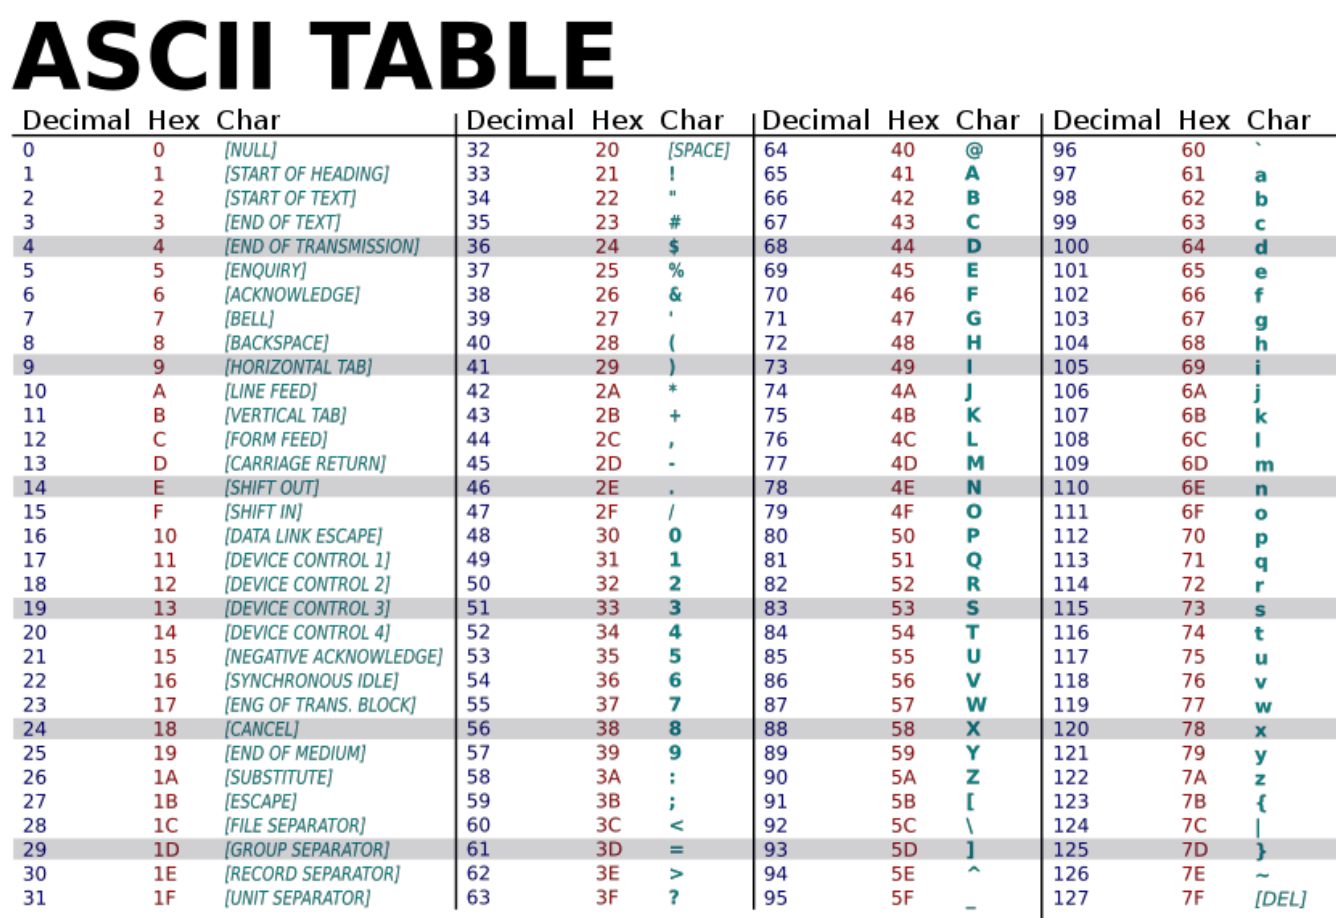

# Python 的工具包

In [23]:
import numpy
import torch

A = numpy.random.randn(2, 3)
print(A)
B = numpy.random.randn(3, 2)
print(B)
C = numpy.dot(A, B)
print(C)

[[ 0.74261699 -0.01958112  0.07532856]
 [ 1.34220313 -0.9190103   0.11943872]]
[[-1.11370049 -1.79200563]
 [ 0.67668534 -0.75209508]
 [-1.80665146 -0.85216086]]
[[-0.97639562 -1.38023902]
 [-2.33247721 -1.81583344]]


# 基本数据结构及应用

```
链表、栈、队列
```

- 链表, Linked List, 鏈結串列

在電腦科學中，鏈結串列（Linked list）是一種常見的基礎資料結構，是一種線性表，但是並不會按線性的順序儲存資料，而是在每一個節點裡存到下一個節點的指標(Pointer)。由於不必須按順序儲存，鏈結串列在插入的時候可以達到O(1)的複雜度，比另一種線性表順序表快得多，但是尋找一個節點或者存取特定編號的節點則需要O(n)的時間，而順序表相應的時間複雜度分別是O(logn)和O(1)。

使用鏈結串列結構可以克服陣列鏈結串列需要預先知道資料大小的缺點，鏈結串列結構可以充分利用電腦記憶體空間，實現靈活的記憶體動態管理。但是鏈結串列失去了陣列隨機讀取的優點，同時鏈結串列由於增加了結點的指標域，空間開銷比較大。

https://en.wikipedia.org/wiki/Linked_list

- 栈, Stack, 堆疊

是计算机科學中的一種抽象資料型別，只允許在有序的線性資料集合的一端（稱為堆疊頂端，英語：top）進行加入数据（英語：push）和移除数据（英語：pop）的運算。因而按照後進先出（LIFO, Last In First Out）的原理運作。常與另一種有序的線性資料集合佇列相提並論。堆疊常用一維数组或連結串列來實現。

https://en.wikipedia.org/wiki/Stack_(abstract_data_type)

- 队列, Queue, 佇列

計算機科學中的一種抽象資料型別，是先進先出（FIFO, First-In-First-Out）的線性表。在具體應用中通常用鍊表或者數組來實現。佇列只允許在後端（稱為rear）進行插入操作，在前端（稱為front）進行刪除操作。佇列的操作方式和堆疊類似，唯一的區別在於佇列只允許新數據在後端進行添加。

https://en.wikipedia.org/wiki/Queue_(abstract_data_type)

Reference :

1. 你所不知道的 C 語言: linked list 和非連續記憶體, https://hackmd.io/@sysprog/c-linked-list , 成功大學 Linux 核心設計/實作 (Linux Kernel Internals), Jim Huang 黃敬群.


# 什么是数据结构?

1. 数据顺序和位置关系的便是“数据结构”。

2. 根据使用目的选择合适的数据结构，可以提高内存的利用率。

```
Key : 

数据结构, 資料結構, Data Structure

内存, 記憶體, Memory
```
例子: 电话簿的数据结构

- 从上往下顺序添加

- 按姓名的拼音顺序排列

- 获取顺序与拼音顺序结合

# 基本数据结构

- 栈, Stack, 堆疊

- 队列, Queue, 佇列

- 双向队列, Deque(double-ended queue), 雙端佇列

雙端佇列（deque，全名double-ended queue）是一種具有佇列和堆疊性質的抽象資料類型。雙端佇列中的元素可以從兩端彈出，插入和刪除操作限定在佇列的兩邊進行。

https://en.wikipedia.org/wiki/Double-ended_queue

- 链表, Linked List, 鏈結串列




# 什么是数据结构?

1. 十进制转二进制

2. 圈圈杀, 約瑟夫環, Josephus Problem or Josephus permutation

3. LeetCode 239 Sliding Windows Maximum 滑动窗口最大值

## Tip 1 約瑟夫環 Josephus problem or Josephus permutation

阿橋問題（有時也稱為約瑟夫斯置換），是一個出現在電腦科學和數學中的問題。在電腦編程的演算法中，類似問題又稱為約瑟夫環。人們站在一個等待被處決的圈子裡。 計數從圓圈中的指定點開始，並沿指定方向圍繞圓圈進行。 在跳過指定數量的人之後，處刑下一個人。 對剩下的人重複該過程，從下一個人開始，朝同一方向跳過相同數量的人，直到只剩下一個人，並被釋放。問題即，給定人數、起點、方向和要跳過的數字，選擇初始圓圈中的位置以避免被處決。

這個問題是以弗拉維奧·約瑟夫斯命名的，他是 1 世紀的一名猶太歷史學家。他在自己的日記中寫道，他和他的40個戰友被羅馬軍隊包圍在洞中。他們討論是自殺還是被俘，最終決定自殺，並以抽籤的方式決定誰殺掉誰。約瑟夫斯和另外一個人是最後兩個留下的人。約瑟夫斯說服了那個人，他們將向羅馬軍隊投降，不再自殺。約瑟夫斯把他的存活歸因於運氣或天意，他不知道是哪一個

https://en.wikipedia.org/wiki/Josephus_problem

https://zh.wikipedia.org/zh-tw/%E7%BA%A6%E7%91%9F%E5%A4%AB%E6%96%AF%E9%97%AE%E9%A2%98

## Tip 2 LeetCode 239 Sliding Windows Maximum 滑动窗口最大值

You are given an array of integers `nums`, there is a sliding window of size `k` which is moving from the very left of the array to the very right. You can only see the `k` numbers in the window. Each time the sliding window moves right by one position.

Return the max sliding window.



给你一个整数数组 `nums` ，有一个大小为 `k` 的滑动窗口从数组的最左侧移动到数组的最右侧。你只可以看到在滑动窗口内的 `k` 个数字。滑动窗口每次只向右移动一位。

返回 滑动窗口中的最大值 。


Example 1:

```
Input: nums = [1,3,-1,-3,5,3,6,7], k = 3
Output: [3,3,5,5,6,7]
Explanation: 
Window position                Max
---------------               -----
[1  3  -1] -3  5  3  6  7       3
 1 [3  -1  -3] 5  3  6  7       3
 1  3 [-1  -3  5] 3  6  7       5
 1  3  -1 [-3  5  3] 6  7       5
 1  3  -1  -3 [5  3  6] 7       6
 1  3  -1  -3  5 [3  6  7]      7
```

Example 2:

```
Input: nums = [1], k = 1
Output: [1]
```

Constraints:

- $1 <= nums.length <= 105$

- $-104 <= nums[i] <= 104$

- $1 <= k <= nums.length$

### 思路

- 给定一个数组和一个窗口为 K 的窗口，当窗口从数组的左边滑动到数组右边的时候，输出每次移动窗口以后，在窗口内的最大值。

- 这道题最暴力的方法就是 2 层循环，时间复杂度 O(n * K)。

- 另一种思路是用优先队列，每次窗口以后的时候都向优先队列里面新增一个节点，并删除一个节点。时间复杂度是 O(n * log n)

- 最优的解法是用双端队列，队列的一边永远都存的是窗口的最大值，队列的另外一个边存的是比最大值小的值。队列中最大值左边的所有值都出队。在保证了双端队列的一边即是最大值以后，时间复杂度是 O(n)，空间复杂度是 O(K)

Reference :

https://books.halfrost.com/leetcode/ChapterFour/0200~0299/0239.Sliding-Window-Maximum/

# 栈, Stack, 堆疊

栈(Last In First Out，LIFO)是一个项的有序集合，其 中添加移除新项总发生在同一端。这一端通常称为“顶部”。与顶部对应的端称为“底部”。

栈的抽象数据类型由以下结构和操作定义。栈被构造为项的有序集合，其中项被添加和从末端移除的位置称为“顶部”。

## 栈操作如下:
- Stack() 创建一个空的新栈。 它不需要参数，并返回一个空栈。

- push(item) 将一个新项添加到栈的顶部。它需要 item 做参数并不返回任何内容。

- pop() 从栈中删除顶部项。它不需要参数并返回 item 。栈被修改。

- peek() 从栈返回顶部项，但不会删除它。不需要参数。不修改栈。

- isEmpty() 测试栈是否为空。不需要参数，并返回布尔值。

- size() 返回栈中的 item 数量。不需要参数，并返回一个整数。

# 栈, Stack, 堆疊 - Python 實現

```
class Stack:
    def __init__(self):
        self.items = []
    def isEmpty(self):
        return self.items == []
    def push(self, item):
        self.items.append(item)
    def pop(self):
        return self.items.pop()
    def peek(self):
        return self.items[len(self.items) - 1]
    def size(self):
        return len(self.items)
```

In [24]:
class Stack:
    def __init__(self):
        self.items = []
    def isEmpty(self):
        return self.items == []
    def push(self, item):
        self.items.append(item)
    def pop(self):
        return self.items.pop()
    def peek(self):
        return self.items[len(self.items) - 1]
    def size(self):
        return len(self.items)

s = Stack()
print(s.isEmpty())
s.push(4)
s.push('dog')
print(s.peek())
s.push(True)
print(s.size())
print(s.isEmpty())
s.push(8.4)
print(s.pop())
print(s.pop())
print(s.size())

True
dog
3
False
8.4
True
2


# 栈, Stack, 堆疊,应用 - 十进制转二进制

十進制 $233_{10}$ 以及對應的二進制表示 $11101001_{2}$

$233_{10} = 2 \times 10_{2} + 3 \times 10_{1} + 3 \times 10_{0}$

$ 11101001_{2} = 1 \times 2_{7} + 1 \times 2_{6} + 1 \times 2_{5} + 0 \times 2_{4}+ 1 \times 2_{3} + 0 \times 2_{2} + 0 \times 2_{1} + 1 \times 2_{0}$

```
def divideBy2(decNumber):
    remstack = Stack()
    while decNumber > 0 :
        rem = decNumber % 2
        remstack.push(rem)
        decNumber = decNumber // 2
    binString = ""
    while not remstack.isEmpty():
        binString = binString + str(remstack.pop())
    return binString
```
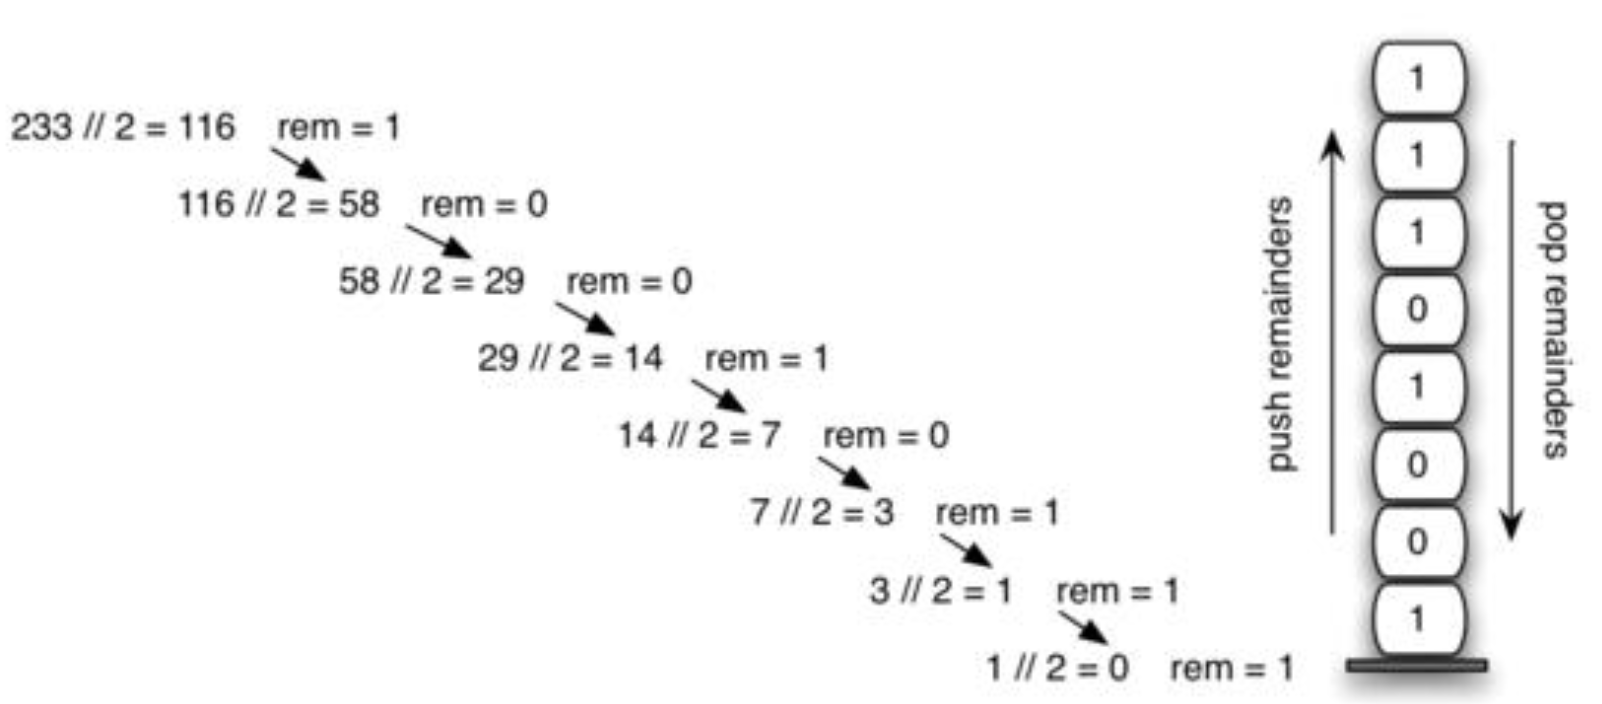

In [25]:
class Stack:
    def __init__(self):
        self.items = []
    def isEmpty(self):
        return self.items == []
    def push(self, item):
        self.items.append(item)
    def pop(self):
        return self.items.pop()
    def peek(self):
        return self.items[len(self.items) - 1]
    def size(self):
        return len(self.items)

def divideBy2(decNumber):
    remstack = Stack()
    while decNumber > 0 :
        rem = decNumber % 2
        remstack.push(rem)
        decNumber = decNumber // 2
    binString = ""
    while not remstack.isEmpty():
        binString = binString + str(remstack.pop())
    return binString

print(divideBy2(100))

1100100


# 栈, Stack, 堆疊, 十进制转任意(二到十六)进制

```
def baseConverter(decNumber, base):
    digits = "0123456789ABCDEF"
    remstack = Stack()
    while decNumber > 0:
        rem = decNumber % base
        remstack.push(rem)
        decNumber = decNumber // base
    newString = ""
    while not remstack.isEmpty():
        newString = newString + digits[remstack.pop()]
    return newString
```

In [26]:
class Stack:
    def __init__(self):
        self.items = []
    def isEmpty(self):
        return self.items == []
    def push(self, item):
        self.items.append(item)
    def pop(self):
        return self.items.pop()
    def peek(self):
        return self.items[len(self.items) - 1]
    def size(self):
        return len(self.items)

def baseConverter(decNumber, base):
    digits = "0123456789ABCDEF"
    remstack = Stack()
    while decNumber > 0:
        rem = decNumber % base
        remstack.push(rem)
        decNumber = decNumber // base
    newString = ""
    while not remstack.isEmpty():
        newString = newString + digits[remstack.pop()]
    return newString

print(baseConverter(109, 16))

6D
